##  TITANIC DATASET

### The Titanic Problem is based on the sinking of the ‘Unsinkable’ ship Titanic in early 1912. It gives you information about multiple people like their ages, sexes, sibling counts, embarkment points, and whether or not they survived the disaster. Based on these features, you have to predict if an arbitrary passenger on Titanic would survive the sinking or not. 

#### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score,RandomizedSearchCV
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.metrics import roc_curve,roc_auc_score,plot_roc_curve
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
import pickle
import warnings
warnings.filterwarnings('ignore')

#### Loading dataset

In [2]:
df = pd.read_csv("titanic_train.csv")
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### The dataset is a classification problem, to be specific this comes under Binary Classification, 
#### where 0-not survived,1-survived 

#### Checking for null values

In [3]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

#### The column 'Age' have 177 null values, 'Cabin' have 687 and 'Embarked' have 2 null values

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### Handling Null values

#### Column cabin have more null values, so lets drop that

In [5]:
df = df.drop('Cabin',axis=1)
df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C


#### In column 'Age' replacing null values with mean 
#### In column 'Embarked' replacing null values with mode

In [6]:
df["Age"] = df['Age'].fillna(df['Age'].mean())
df["Embarked"] = df["Embarked"].fillna(df["Embarked"].mode()[0])

In [7]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

#### Now, the dataset doesn't have any null values

#### Before proceeding with EDA, lets convert the categorical variables to numerical variables

In [8]:
from sklearn.preprocessing import LabelEncoder
label_enc = LabelEncoder()
for column in df:
    df[column] = label_enc.fit_transform(df[column])
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,0,2,108,1,28,1,0,523,18,2
1,1,1,0,190,0,52,1,0,596,207,0
2,2,1,2,353,0,34,0,0,669,41,2
3,3,1,0,272,0,48,1,0,49,189,2
4,4,0,2,15,1,48,0,0,472,43,2


#### Setting PassengerId as index

In [9]:
df = df.set_index('PassengerId')
df.head(2)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
0,0,2,108,1,28,1,0,523,18,2
1,1,0,190,0,52,1,0,596,207,0


### EDA

#### Visualizing the realtionship of feature variables with Target variable

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

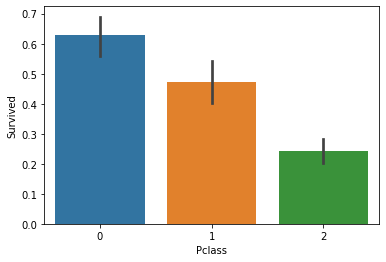

In [10]:
sns.barplot(x='Pclass',y='Survived',data=df)

#### The people inside Pclass 0 have the higher chance of survival and gradually the chance of survival decreases in class1 and class2 respectively

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

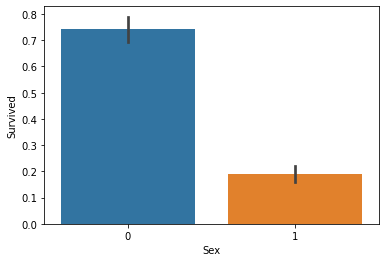

In [11]:
sns.barplot(x="Sex",y="Survived",data=df)

#### Most of the females survived as compared to males

<AxesSubplot:xlabel='Age', ylabel='Survived'>

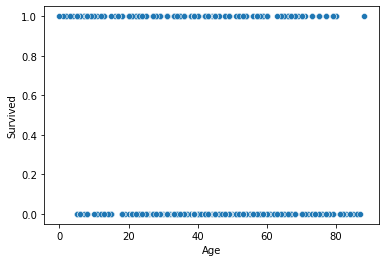

In [12]:
sns.scatterplot(x="Age",y="Survived",data=df)

#### Age doesn't seems to have any relation with survival

<AxesSubplot:xlabel='SibSp', ylabel='Survived'>

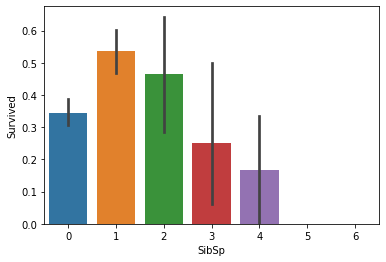

In [13]:
sns.barplot(x="SibSp",y="Survived",data=df)

#### SibSp 1 have most number of survived people followed by 2,0,3 and 4 respectively

<AxesSubplot:xlabel='Parch', ylabel='Survived'>

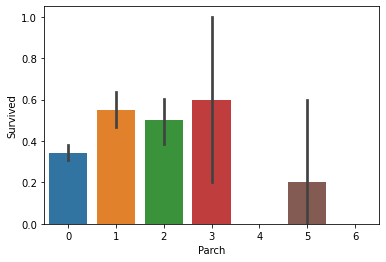

In [14]:
sns.barplot(x="Parch",y="Survived",data=df)

#### People in parch 3 have more number of survived people followed 1,2,0 and 5

<AxesSubplot:xlabel='Ticket', ylabel='Survived'>

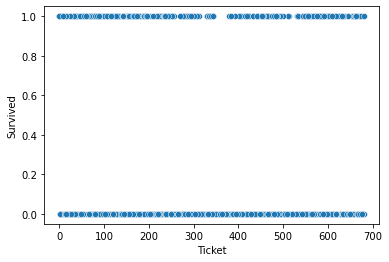

In [15]:
sns.scatterplot(x="Ticket",y="Survived",data=df)

#### Ticket doesn't have much role in the surviveness

<AxesSubplot:xlabel='Embarked', ylabel='Survived'>

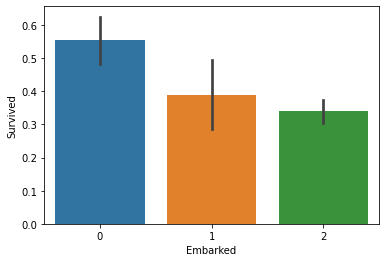

In [16]:
sns.barplot(x="Embarked",y="Survived",data=df)

#### The class 0 have higher chance of survival followed by 1 and 2

#### Checking Correlation

In [17]:
df.corr()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
Survived,1.000000,-0.338481,-0.057343,-0.543351,-0.062470,-0.026385,0.081629,-0.164549,0.333943,-0.167675
Pclass,-0.338481,1.000000,0.052831,0.131900,-0.336631,0.078141,0.018443,0.319869,-0.724119,0.162098
Name,-0.057343,0.052831,1.000000,0.020314,0.057270,-0.035535,-0.049105,0.047348,-0.053846,-0.006117
Sex,-0.543351,0.131900,0.020314,1.000000,0.078523,-0.123164,-0.245489,0.059372,-0.265389,0.108262
Age,-0.062470,-0.336631,0.057270,0.078523,1.000000,-0.244913,-0.165137,-0.071081,0.122586,-0.023574
SibSp,-0.026385,0.078141,-0.035535,-0.123164,-0.244913,1.000000,0.423338,0.069238,0.368688,0.065635
Parch,0.081629,0.018443,-0.049105,-0.245489,-0.165137,0.423338,1.000000,0.020003,0.361243,0.039798
Ticket,-0.164549,0.319869,0.047348,0.059372,-0.071081,0.069238,0.020003,1.000000,-0.168153,-0.001729
Fare,0.333943,-0.724119,-0.053846,-0.265389,0.122586,0.368688,0.361243,-0.168153,1.000000,-0.158036
Embarked,-0.167675,0.162098,-0.006117,0.108262,-0.023574,0.065635,0.039798,-0.001729,-0.158036,1.000000


#### Columns 'Sex' have high correlation with target variable followed 'Pclass' and 'Fare', columns 'SibSp' have least correlation with target varaible

#### Checking the statistical distribution of the dataset

In [18]:
df.describe()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,1.308642,445.000000,0.647587,39.245791,0.507295,0.381594,338.528620,105.355780,1.536476
std,0.486592,0.836071,257.353842,0.477990,16.709722,1.005995,0.806057,200.850657,70.082521,0.791503
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,222.500000,0.000000,28.000000,0.000000,0.000000,158.500000,40.500000,1.000000
50%,0.000000,2.000000,445.000000,1.000000,39.000000,0.000000,0.000000,337.000000,94.000000,2.000000
75%,1.000000,2.000000,667.500000,1.000000,48.000000,1.000000,0.000000,519.500000,157.000000,2.000000
max,1.000000,2.000000,890.000000,1.000000,88.000000,6.000000,6.000000,680.000000,247.000000,2.000000


#### Shape of dataset

In [19]:
print("Titanic dataset's shape is ",df.shape)

Titanic dataset's shape is  (891, 10)


#### Checking for outliers

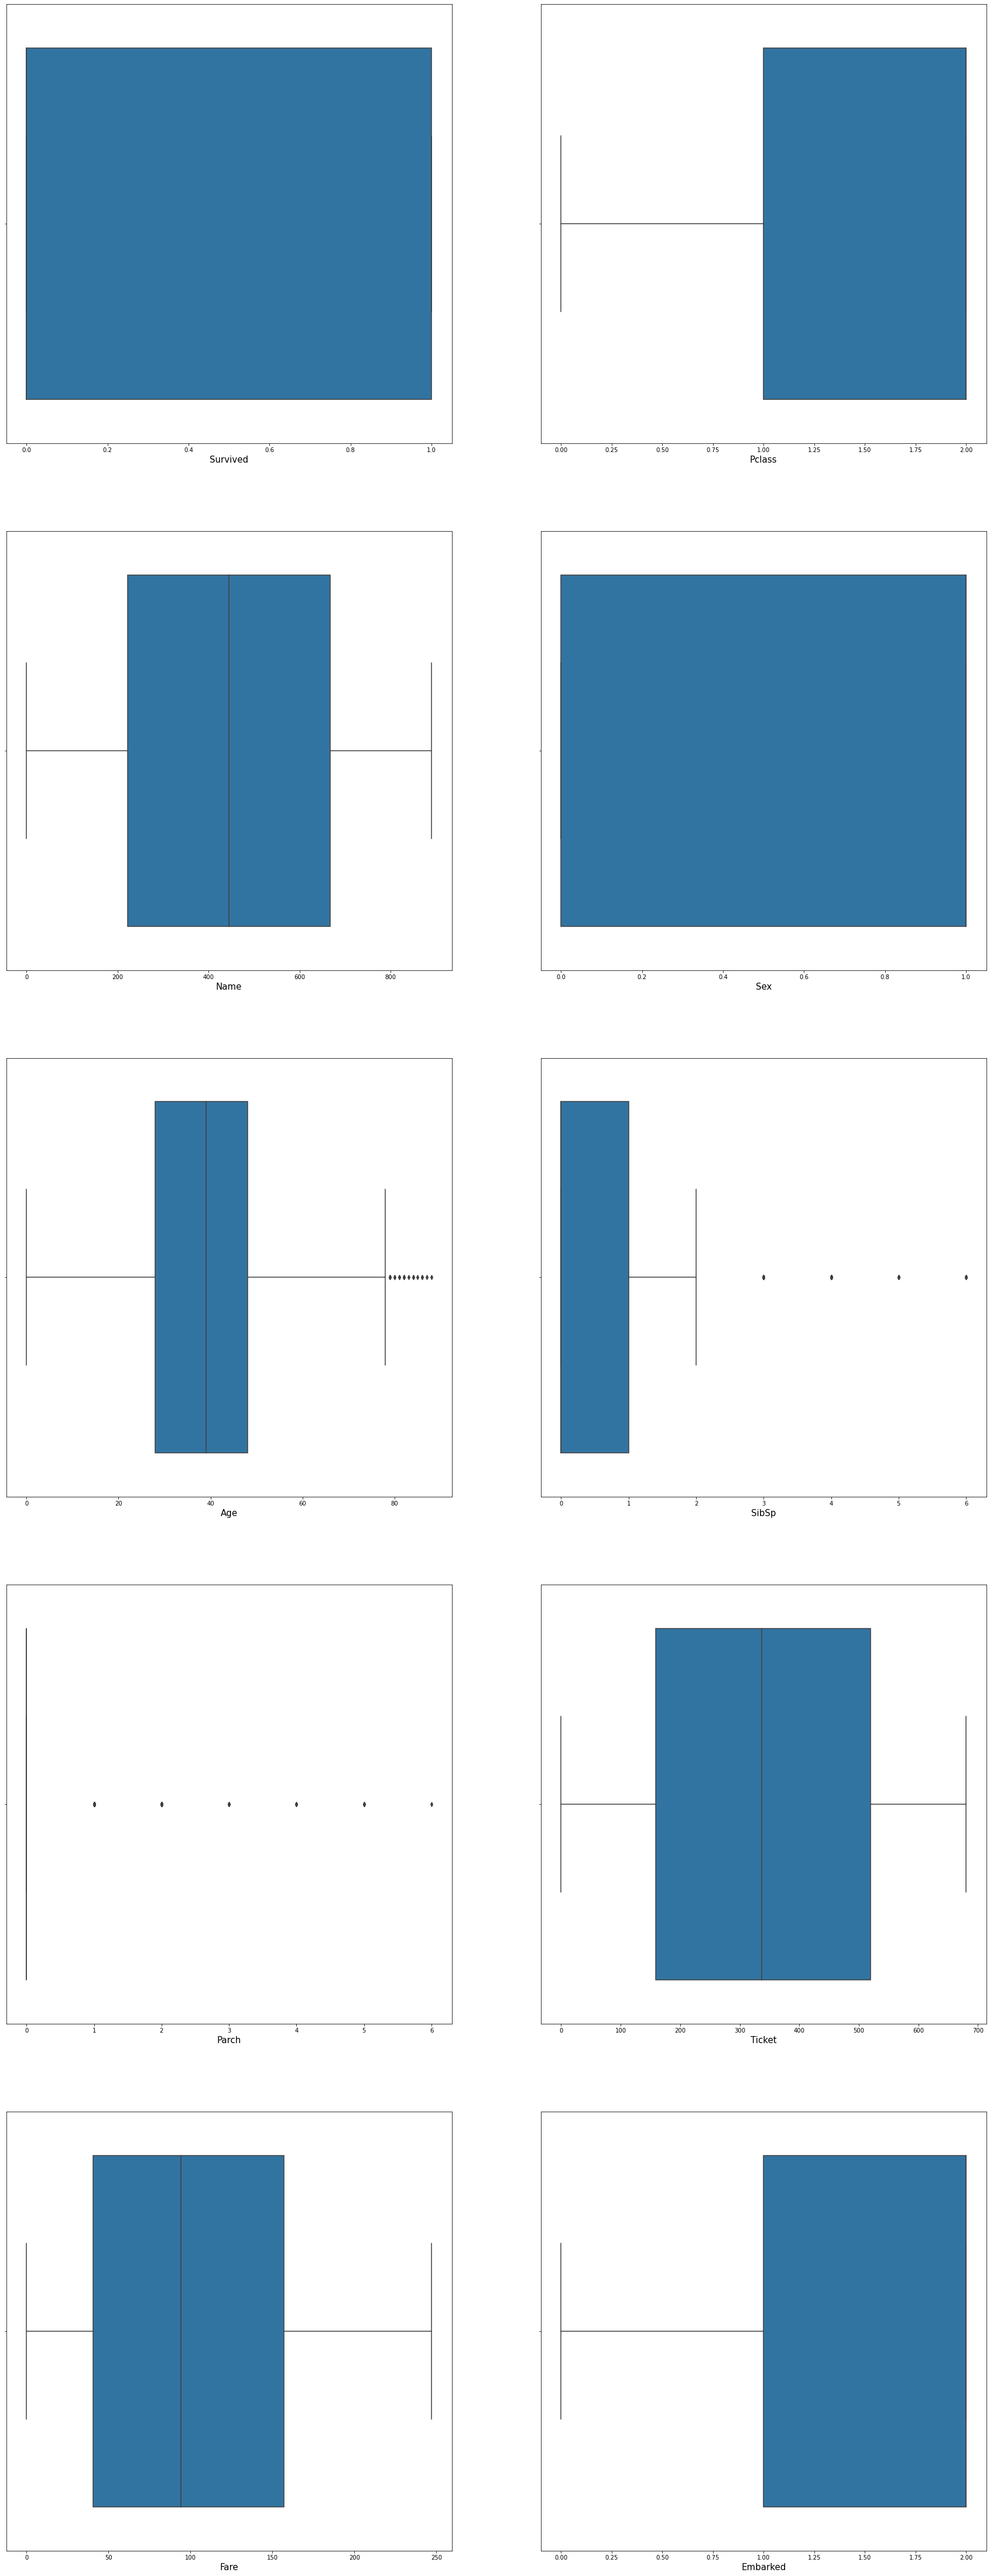

In [20]:
plt.figure(figsize=(30,80))
gr = 1
for column in df:
    if gr<=10:
        ax = plt.subplot(5,2,gr)
        sns.boxplot(df[column],orient='v')
        plt.xlabel(column,fontsize=15)
    gr+=1
plt.show()

#### Dataset seems to have outliers in columns 'Age','SibSp' and 'Parch'

#### Checking Skewness

In [21]:
df.skew()

Survived    0.478523
Pclass     -0.630548
Name        0.000000
Sex        -0.618921
Age         0.357165
SibSp       2.949902
Parch       2.749117
Ticket      0.000246
Fare        0.366943
Embarked   -1.264823
dtype: float64

#### The columns 'Pclass','Sex','SibSp','Parch' and 'Embarked' is skewed

#### Visualizing the distibution

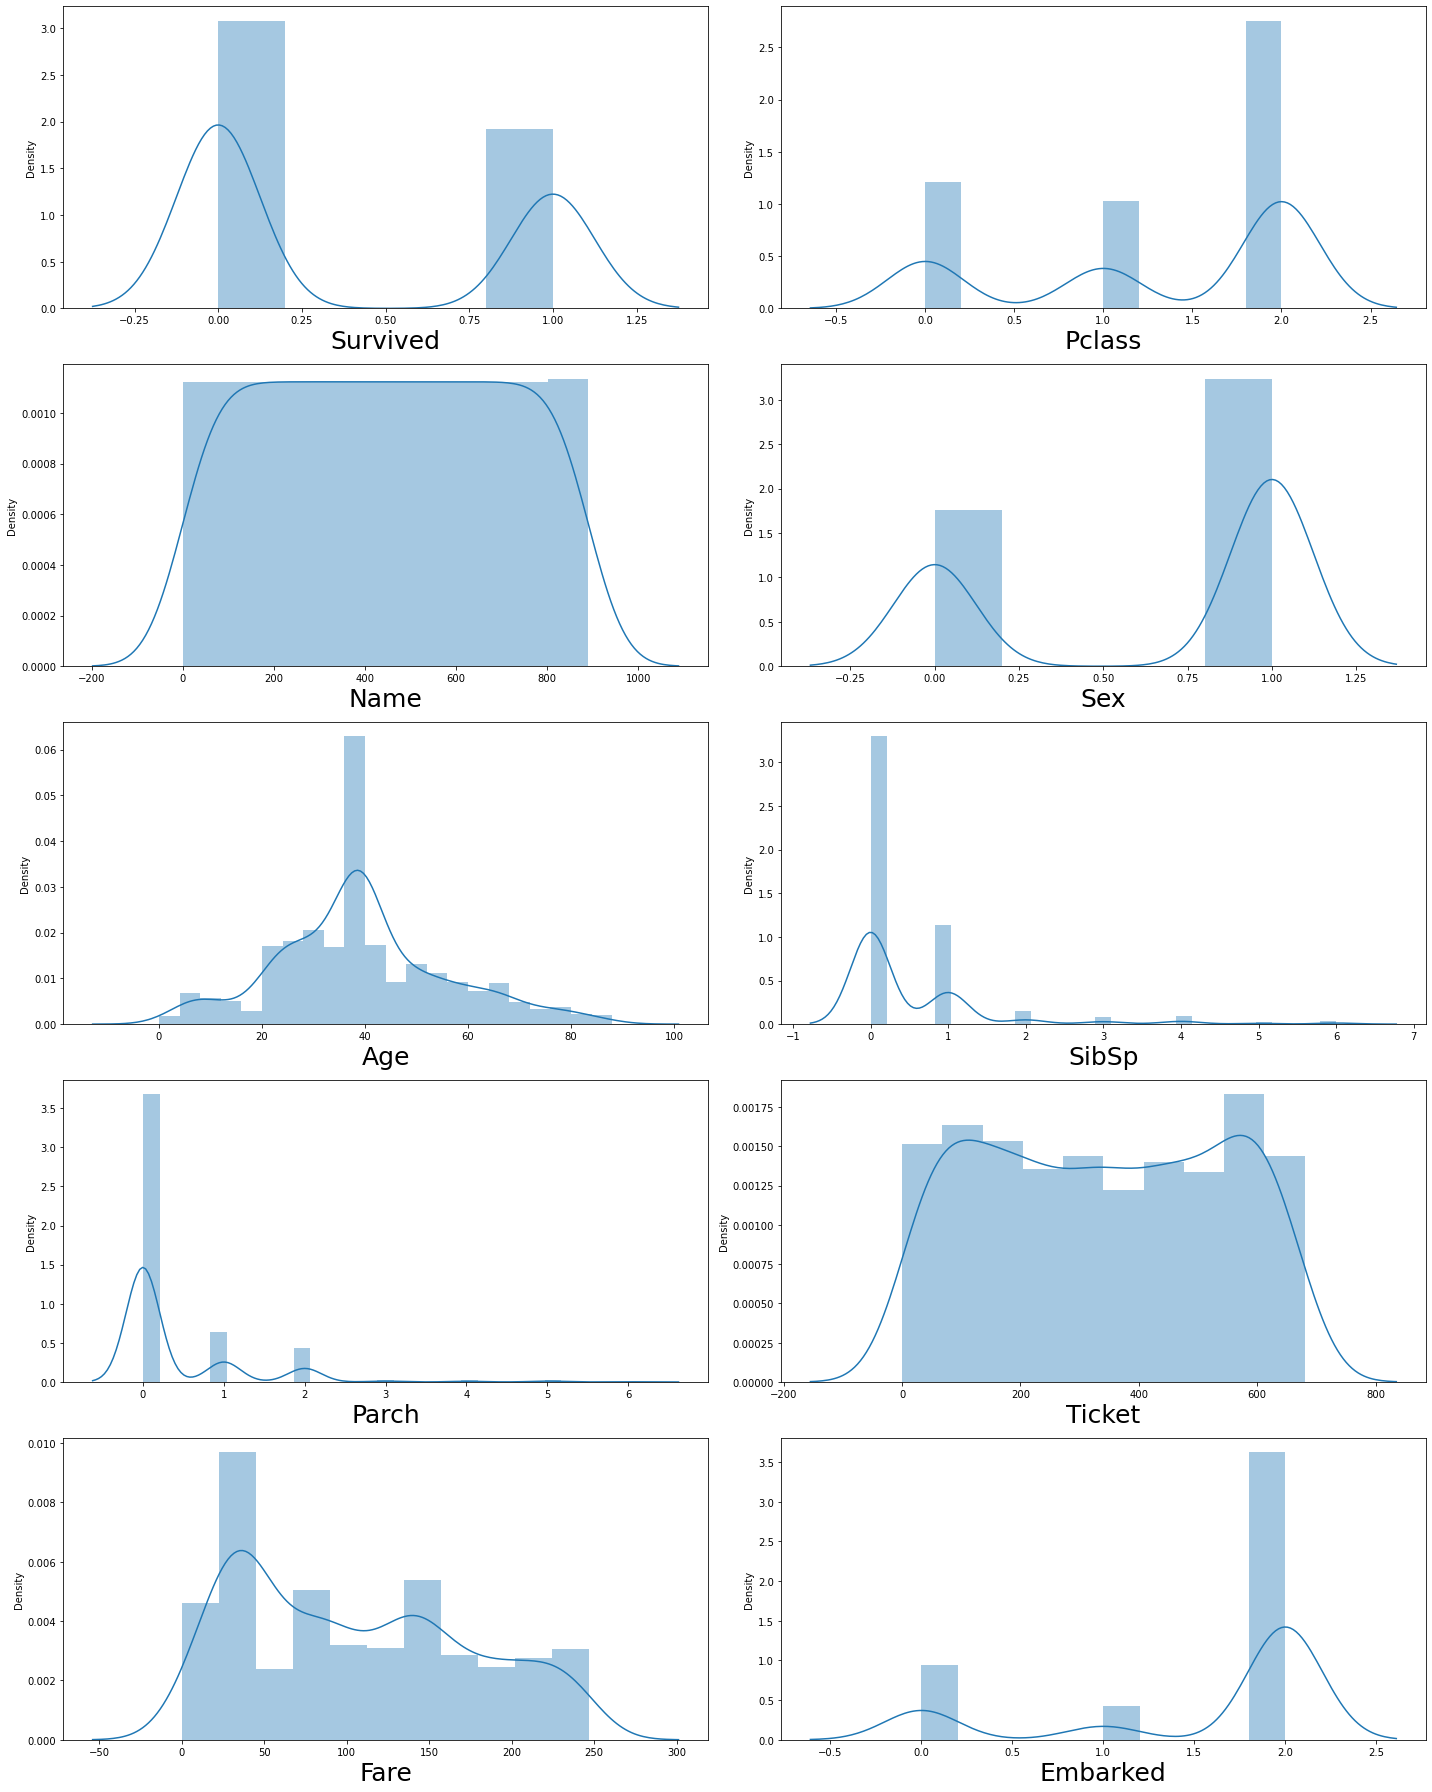

In [22]:
plt.figure(figsize=(20,25),facecolor="white")
plotnumber=1
for column in df:
    if plotnumber<=10:
        ax=plt.subplot(5,2,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=25)
    plotnumber+=1
plt.tight_layout()

### Data Cleaning

In [23]:
column_drop = pd.DataFrame([["Parch","0.08","2.75"],["SibSp","-0.03","2.95"],["Name","-0.05","0.00"]],columns=["Feature Variable","Correlation","Skewness"])
column_drop

,Feature Variable,Correlation,Skewness
0,Parch,0.08,2.75
1,SibSp,-0.03,2.95
2,Name,-0.05,0.00


In [24]:
df = df.drop(columns=['Parch','SibSp','Name'])
df.head(3)

,Survived,Pclass,Sex,Age,Ticket,Fare,Embarked
PassengerId,,,,,,,
0,0,2,1,28,523,18,2
1,1,0,0,52,596,207,0
2,1,2,0,34,669,41,2


#### Checking whether the data is imbalanced or not

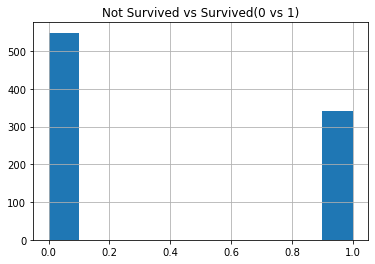

In [25]:
df['Survived'].hist(grid=True)
plt.title("Not Survived vs Survived(0 vs 1)")
plt.show()

In [26]:
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

#### lets consider that the data is balanced

#### Outliers removal from the dataset, only the column 'Age' has outliers

In [27]:
percentile25 = df['Age'].quantile(0.25)
percentile75 = df['Age'].quantile(0.75)
iqr = percentile75-percentile25
upper_limit = percentile75 + 1.5 * iqr
df = df[df['Age'] < upper_limit]
df.shape       

(869, 7)

#### Data Loss in percentages

In [28]:
loss = (891-869)/891*100
print("After outlier removal we loss ",loss,"% of data")

After outlier removal we loss  2.4691358024691357 % of data


#### Splitting dataset into fetaure variables(x) and Target variable(y)

In [29]:
x = df.drop('Survived',axis=1)
y = df['Survived']

#### Removing skewness from x

In [30]:
from sklearn.preprocessing import power_transform
x_new = power_transform(x,method='yeo-johnson')
x_new

array([[ 0.84526252,  0.74655721, -0.63859546,  0.90864269, -1.42252895,
         0.61216956],
       [-1.50831437, -1.33948207,  0.89531611,  1.19967862,  1.30857125,
        -1.77574008],
       [ 0.84526252, -1.33948207, -0.24523481,  1.47966905, -0.84662883,
         0.61216956],
       ...,
       [ 0.84526252, -1.33948207,  0.07691289,  1.5022418 ,  0.51260749,
         0.61216956],
       [-1.50831437,  0.74655721, -0.24523481, -2.01500487,  0.76242442,
        -1.77574008],
       [ 0.84526252,  0.74655721,  0.33145237,  0.67239908, -1.0944198 ,
        -1.22743387]])

In [31]:
# Checking the skewness of x_new
x_new = pd.DataFrame(x_new,columns=x.columns)
x_new.skew()

Pclass     -0.502737
Sex        -0.593951
Age        -0.021815
Ticket     -0.295221
Fare       -0.160135
Embarked   -1.058546
dtype: float64

#### Still skewness exists

#### Scaling the data

In [32]:
scale = StandardScaler()
X_scaled = scale.fit_transform(x)

#### Finding the best random state

In [33]:
from sklearn.linear_model import LogisticRegression
max_accuracy = 0
max_rs = 0
for i in range(1,300):
    x_train,x_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.25,random_state = i)
    LR = LogisticRegression()
    LR.fit(x_train,y_train)
    y_pred = LR.predict(x_test)
    accu_score = accuracy_score(y_test,y_pred)
    if accu_score>max_accuracy:
        max_accuracy = accu_score
        max_rs = i
print("Maximum accuracy is",max_accuracy,"when",max_rs,"is the random state")

Maximum accuracy is 0.8715596330275229 when 111 is the random state


#### Splitting into train and test data

In [34]:
x_train,x_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.25,random_state = 111)

### MODEL TRAINING

### Logistic Regression

In [35]:
lr = LogisticRegression()
lr.fit(x_train,y_train)
y_pred_lr = lr.predict(x_test)
lr_accuracy = accuracy_score(y_test,y_pred_lr)
print("Accuracy of Logistic Regression model is ",lr_accuracy)
print("Confusion Matrix","\n",confusion_matrix(y_test,y_pred_lr))
classification_rep = classification_report(y_test,y_pred_lr)
print("Classification report ; \n",classification_rep)

Accuracy of Logistic Regression model is  0.8715596330275229
Confusion Matrix 
 [[121  11]
 [ 17  69]]
Classification report ; 
               precision    recall  f1-score   support

           0       0.88      0.92      0.90       132
           1       0.86      0.80      0.83        86

    accuracy                           0.87       218
   macro avg       0.87      0.86      0.86       218
weighted avg       0.87      0.87      0.87       218



#### Logistic Regression model performs with an accuracy 87.16%

#### KNN

In [36]:
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)
y_pred_knn = knn.predict(x_test)
knn_accuracy = accuracy_score(y_test,y_pred_knn)
conf_mat = confusion_matrix(y_test,y_pred_knn)
classification_rep = classification_report(y_test,y_pred_knn)
print("Accuracy of KNN model is ",knn_accuracy)
print("Confusion Matrix","\n",conf_mat)
print("Classification report ; \n",classification_rep)

Accuracy of KNN model is  0.8394495412844036
Confusion Matrix 
 [[117  15]
 [ 20  66]]
Classification report ; 
               precision    recall  f1-score   support

           0       0.85      0.89      0.87       132
           1       0.81      0.77      0.79        86

    accuracy                           0.84       218
   macro avg       0.83      0.83      0.83       218
weighted avg       0.84      0.84      0.84       218



#### KNN performs with an accuracy of 83.94%

#### DecisionTree Classifier

In [37]:
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
y_pred_dt = dt.predict(x_test)
dt_accuracy = accuracy_score(y_test,y_pred_dt)
conf_mat = confusion_matrix(y_test,y_pred_dt)
classification_rep = classification_report(y_test,y_pred_dt)
print("Accuracy of Decision Tree classifier model is ",dt_accuracy)
print("Confusion Matrix","\n",conf_mat)
print("Classification report ; \n",classification_rep)

Accuracy of Decision Tree classifier model is  0.7981651376146789
Confusion Matrix 
 [[103  29]
 [ 15  71]]
Classification report ; 
               precision    recall  f1-score   support

           0       0.87      0.78      0.82       132
           1       0.71      0.83      0.76        86

    accuracy                           0.80       218
   macro avg       0.79      0.80      0.79       218
weighted avg       0.81      0.80      0.80       218



#### DecisionTree works with an accuracy of 79.82%

#### Random Forest Classifier

In [38]:
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred_rf = rf.predict(x_test)
rf_accuracy = accuracy_score(y_test,y_pred_rf)
conf_mat = confusion_matrix(y_test,y_pred_rf)
classification_rep = classification_report(y_test,y_pred_rf)
print("Accuracy of Random forest classifier model is ",rf_accuracy)
print("Confusion Matrix","\n",conf_mat)
print("Classification report ; \n",classification_rep)

Accuracy of Random forest classifier model is  0.8532110091743119
Confusion Matrix 
 [[113  19]
 [ 13  73]]
Classification report ; 
               precision    recall  f1-score   support

           0       0.90      0.86      0.88       132
           1       0.79      0.85      0.82        86

    accuracy                           0.85       218
   macro avg       0.85      0.85      0.85       218
weighted avg       0.86      0.85      0.85       218



#### Random Forest model works with an accuracy of 85.32%

#### SVC

In [39]:
svc = SVC()
svc.fit(x_train,y_train)
y_pred_svc = svc.predict(x_test)
svc_accuracy = accuracy_score(y_test,y_pred_svc)
conf_mat = confusion_matrix(y_test,y_pred_svc)
classification_rep = classification_report(y_test,y_pred_svc)
print("Accuracy of SVC model is ",svc_accuracy)
print("Confusion Matrix","\n",conf_mat)
print("Classification report ; \n",classification_rep)

Accuracy of SVC model is  0.8623853211009175
Confusion Matrix 
 [[125   7]
 [ 23  63]]
Classification report ; 
               precision    recall  f1-score   support

           0       0.84      0.95      0.89       132
           1       0.90      0.73      0.81        86

    accuracy                           0.86       218
   macro avg       0.87      0.84      0.85       218
weighted avg       0.87      0.86      0.86       218



#### SVC works with an accuracy of 86.24%

#### XGBClassifier

In [40]:
xgbc = XGBClassifier()
xgbc.fit(x_train,y_train)
y_pred_xgbc = xgbc.predict(x_test)
xgbc_accuracy = accuracy_score(y_test,y_pred_xgbc)
conf_mat = confusion_matrix(y_test,y_pred_xgbc)
classification_rep = classification_report(y_test,y_pred_xgbc)
print("Accuracy of Xgboost model is ",xgbc_accuracy)
print("Confusion Matrix","\n",conf_mat)
print("Classification report ; \n",classification_rep)

[19:28:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy of Xgboost model is  0.8394495412844036
Confusion Matrix 
 [[111  21]
 [ 14  72]]
Classification report ; 
               precision    recall  f1-score   support

           0       0.89      0.84      0.86       132
           1       0.77      0.84      0.80        86

    accuracy                           0.84       218
   macro avg       0.83      0.84      0.83       218
weighted avg       0.84      0.84      0.84       218



#### XGBClassifier works with an accuracy of 83.95%

### Checking Cross Validation Score

In [41]:
cvs = cross_val_score(lr,X_scaled,y,cv=5)
print("Cross validation score of Logistic Regression model is : ",cvs.mean())

Cross validation score of Logistic Regression model is :  0.7882798485150488


In [42]:
cvs = cross_val_score(knn,X_scaled,y,cv=5)
print("Cross validation score of KNN model is : ",cvs.mean())

Cross validation score of KNN model is :  0.8020663078865192


In [43]:
cvs = cross_val_score(dt,X_scaled,y,cv=5)
print("Cross validation score of DecisionTreeClassifier is : ",cvs.mean())

Cross validation score of DecisionTreeClassifier is :  0.7952361969304365


In [44]:
cvs = cross_val_score(rf,X_scaled,y,cv=5)
print("Cross validation score of RandomForestClassifier is : ",cvs.mean())

Cross validation score of RandomForestClassifier is :  0.8274333931300246


In [45]:
cvs = cross_val_score(svc,X_scaled,y,cv=5)
print("Cross validation score of SVC is : ",cvs.mean())

Cross validation score of SVC is :  0.8112949305693974


In [47]:
cvs = cross_val_score(xgbc,X_scaled,y,cv=5)
print("Cross validation score of XGBoostClassifier is : ",cvs.mean())

[19:30:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:30:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:30:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:30:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

#### Finding out the best model

In [48]:
model = pd.DataFrame([["Logistic Regression","87.16","78.83","8.33"],["KNeighborsClassifier","83.94","80.20","3.74"],["DecisionTreeClassifier","79.82","79.52","0.3"],["RandomForestClassifier","85.32","82.74","2.58"],["SVC","86.24","81.13","5.11"],["XGBClassifier","83.95","82.05","1.9"]],columns=["Model Name","Accuracy Score","Cross Validation Score","Difference"])
model

,Model Name,Accuracy Score,Cross Validation Score,Difference
0,Logistic Regression,87.16,78.83,8.33
1,KNeighborsClassifier,83.94,80.20,3.74
2,DecisionTreeClassifier,79.82,79.52,0.3
3,RandomForestClassifier,85.32,82.74,2.58
4,SVC,86.24,81.13,5.11
5,XGBClassifier,83.95,82.05,1.9


#### DecisionTreeClassifier seems to be the best model with a cross-validation score of 79.18%

### HyperParameter Tuning

In [49]:
params = {"criterion":['gini','entropy'],
         "max_features":np.arange(2,10),
         "max_depth":np.arange(2,10,1),
         'min_samples_split':range(2,12,2)
         }
grd = GridSearchCV(dt,params,cv=5,n_jobs=-1)
grd.fit(x_train,y_train)
grd.best_params_

{'criterion': 'entropy',
 'max_depth': 8,
 'max_features': 5,
 'min_samples_split': 2}

In [50]:
model = DecisionTreeClassifier(criterion='entropy',max_depth=8,max_features=5,min_samples_split=2)
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
print("Accuracy score is : ",accuracy_score(y_test,y_pred))

Accuracy score is :  0.8302752293577982


#### After Hyperparameter tuning Accuracy increased to 83.03%

### Plotting ROC Curve

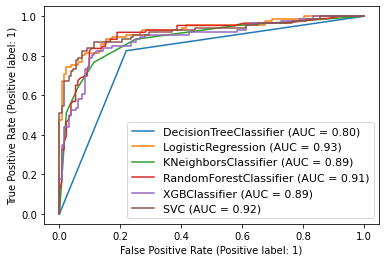

In [51]:
disp = plot_roc_curve(dt,x_test,y_test)
plot_roc_curve(lr,x_test,y_test,ax=disp.ax_)
plot_roc_curve(knn,x_test,y_test,ax=disp.ax_)
plot_roc_curve(rf,x_test,y_test,ax=disp.ax_)
plot_roc_curve(xgbc,x_test,y_test,ax=disp.ax_)
plot_roc_curve(svc,x_test,y_test,ax=disp.ax_)
plt.legend(prop={'size':11},loc='lower right')
plt.show()

### Model Saving

In [52]:
filename = 'Titanic.pkl'
pickle.dump(lr,open(filename,'wb'))